In [1]:
#import the libraries
import pandas as pd
import numpy as np

In [2]:
data_set=pd.read_csv('Bitcoin Historical Data - Investing.com India.csv', sep=';')
data_set.iloc[::-1]

,Date,Price,Open,High,Low,Vol,Change %
746,Mar 13. 2020,5584.3,4815.2,5934.3,3869.5,417M,15.71%
745,Mar 14. 2020,5182.7,5589.4,5634.9,5072.2,169M,-7.19%
744,Mar 15. 2020,5366.3,5182.9,5863.3,5120.6,161M,3.54%
743,Mar 16. 2020,5030.0,5366.4,5369.3,4477.7,255M,-6.27%
742,Mar 17. 2020,5261.1,5030.2,5432.8,4946.5,189M,4.59%
...,...,...,...,...,...,...,...
4,Mar 25. 2022,44331.0,44013.0,45112.0,43622.0,49409M,0.72%
3,Mar 26. 2022,44548.0,44331.0,44818.0,44090.0,19630M,0.49%
2,Mar 27. 2022,46859.0,44542.0,46947.0,44445.0,38879M,5.19%
1,Mar 28. 2022,47105.0,46859.0,48199.0,46672.0,61027M,0.52%


In [3]:
data_set.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol          object
Change %     object
dtype: object

In [4]:
data_set_new =pd.DataFrame(data_set[['Price']].iloc[::-1])
print(data_set_new)

       Price
746   5584.3
745   5182.7
744   5366.3
743   5030.0
742   5261.1
..       ...
4    44331.0
3    44548.0
2    46859.0
1    47105.0
0    47818.0

[747 rows x 1 columns]


In [5]:
d_types_sereis=data_set_new.dtypes
d_types_sereis

Price    float64
dtype: object

In [6]:
prediction_days=30
data_set_new['Prediction']=data_set_new[['Price']].shift(-prediction_days)

In [7]:
data_set_new.head()

,Price,Prediction
746,5584.3,6917.6
745,5182.7,6841.3
744,5366.3,6850.9
743,5030.0,6629.1
742,5261.1,7085.6


In [8]:
data_set_new['Price'] = data_set_new['Price'].astype(float)


In [9]:
data_set_new.Price[1]

47105.0

In [10]:
X=np.array(data_set_new.drop(['Prediction'],1))

In [11]:
X=X[:len(data_set_new)-prediction_days]
X.shape

(717, 1)

In [12]:
print(X.shape)

(717, 1)


In [13]:
y=np.array(data_set_new['Prediction'])
y=y[:-prediction_days]

In [14]:
print(y)

[ 6917.6  6841.3  6850.9  6629.1  7085.6  7035.8  7230.8  7122.9  6833.5
  6842.5  7112.9  7488.5  7503.8  7540.4  7678.9  7766.   7746.9  8770.9
  8629.   8821.6  8966.3  8885.5  8874.7  9001.   9151.4  9979.8  9806.2
  9554.6  8738.8  8579.8  8813.8  9298.7  9778.4  9318.   9379.5  9677.7
  9730.7  9773.3  9512.3  9059.   9169.7  9177.   8728.2  8898.2  8842.5
  9199.1  9572.2  9424.8  9692.5  9454.8 10189.3  9527.6  9667.2  9794.4
  9631.2  9669.6  9742.6  9777.9  9768.8  9878.8  9283.2  9466.6  9471.3
  9345.3  9425.4  9523.5  9464.6  9388.1  9314.   9358.8  9296.4  9683.7
  9624.6  9302.   9247.5  9160.   9008.3  9124.   9185.4  9135.4  9229.9
  9085.1  9067.1  9134.4  9081.   9339.   9256.   9429.9  9235.7  9285.1
  9233.3  9300.8  9243.6  9253.4  9198.7  9135.3  9155.8  9170.2  9208.
  9162.4  9387.3  9513.7  9599.6  9546.4  9704.1  9932.5 11022.8 10908.5
 11105.9 11096.2 11333.4 11803.1 11066.8 11224.4 11184.7 11735.1 11757.1
 11592.  11764.3 11681.2 11889.2 11390.4 11557.2 117

In [15]:
print(y.shape)

(717,)


In [16]:
#split the data in 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [17]:
prediction_days_array=np.array(data_set_new.drop(['Prediction'],1))[-prediction_days:]

In [18]:
print(prediction_days_array)

[[43188.2]
 [44420.3]
 [43912.8]
 [42463. ]
 [39142.7]
 [39395.8]
 [38403.1]
 [38024.8]
 [38744.8]
 [41929. ]
 [39416.3]
 [38730.2]
 [38814.3]
 [37792.4]
 [39671.1]
 [39285.7]
 [41118.7]
 [40914.8]
 [41767.8]
 [42233. ]
 [41276. ]
 [41022. ]
 [42373. ]
 [42912. ]
 [44013. ]
 [44331. ]
 [44548. ]
 [46859. ]
 [47105. ]
 [47818. ]]


In [31]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.00000001)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, gamma=1e-08)

In [32]:
#Test the model
svr_rbf_confidence=svr_rbf.score(x_test, y_test)
print("svr_rbf accuracu:", svr_rbf_confidence)

svr_rbf accuracu: 0.8594858065204007


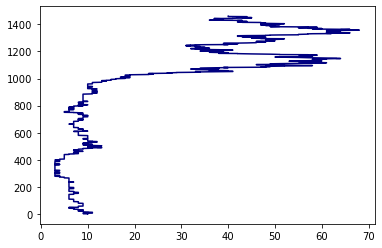

In [138]:
import matplotlib.pyplot as plt
y_=np.linspace(0,1460,1460)
plt.plot(X,y_, color='navy',label='RBF model')

In [139]:
y_.shape

(1460,)

In [140]:
X_train.shape

(1168, 1)